# Extract Features

Visualize IMU data for a crash detection system for a drone that is blind on it left and right sides.

Import Libraries and Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Join data path
current_dir = os.path.curdir
datapath = os.path.join(current_dir, "data")

#### Extract Data
Make sure to install openpyxl library conda to install openpyxl
We're going to only extract Orientation data since it's data is cleaner

In [2]:
orient_data = pd.read_excel(r'.\data\orientation.xlsx')
orient = np.array(orient_data)

# Set up data variables
Xo = np.array(orient[:,1],dtype=np.float32)
Yo = np.array(orient[:,2],dtype=np.float32)
Zo = np.array(orient[:,3],dtype=np.float32)
t = np.arange(0,len(Xo))

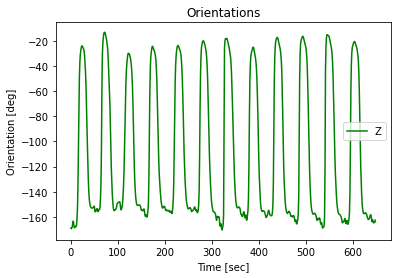

In [3]:
plt.clf()
plt.figure(1)
plt.plot(t,Zo,color='green',label="Z")
plt.legend(['Z'])
plt.xlabel('Time [sec]')
plt.ylabel('Orientation [deg]')
plt.title('Orientations')
plt.show()

## Extract Features

#### Power Spectral Density (PSD)

C:\Users\aqcru\miniconda3\envs\tf\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


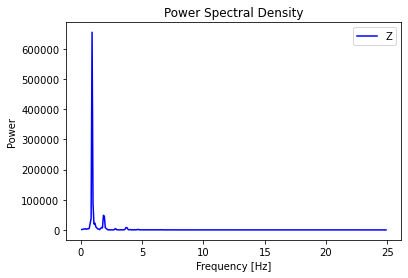

In [4]:
dt = 1/50 # 50 samples per sec
n = len(Zo)
fhat = np.fft.fft(Zo,n)
PSD = fhat*np.conj(fhat)/n
freq = (1/(dt*n))*np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int')

plt.clf()
plt.figure(1)
plt.plot(freq[L],PSD[L],color='blue',label="Z")
plt.legend(['Z'])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.title('Power Spectral Density')
plt.show()

In [5]:
PSD

array([7.87001799e+06+0.j, 1.38992511e+03+0.j, 1.64282442e+03+0.j,
       2.95261342e+03+0.j, 3.16355932e+03+0.j, 3.52041763e+03+0.j,
       2.12749156e+03+0.j, 3.74488959e+03+0.j, 3.56406723e+03+0.j,
       5.16403182e+03+0.j, 2.23639841e+04+0.j, 3.82190281e+04+0.j,
       6.54720781e+05+0.j, 8.85116807e+04+0.j, 1.96805379e+04+0.j,
       2.22294390e+04+0.j, 1.02459152e+04+0.j, 6.78943297e+03+0.j,
       3.26968220e+03+0.j, 3.24156441e+03+0.j, 8.11484246e+02+0.j,
       4.67101042e+03+0.j, 8.15440594e+03+0.j, 6.48785487e+03+0.j,
       4.82243362e+04+0.j, 4.50256873e+04+0.j, 7.15283508e+03+0.j,
       4.99898235e+03+0.j, 1.58904470e+03+0.j, 9.41597975e+00+0.j,
       6.89086948e+02+0.j, 4.84543770e+01+0.j, 1.94368208e+02+0.j,
       1.40544333e+02+0.j, 1.56138314e+02+0.j, 2.50382243e+02+0.j,
       2.60382012e+03+0.j, 4.27337175e+03+0.j, 6.73806717e+02+0.j,
       6.19952700e+02+0.j, 2.19480794e+02+0.j, 7.43331164e+01+0.j,
       3.38489181e+02+0.j, 5.92953780e+02+0.j, 3.36849963e+01+

We see that there is a single frequency that is most prominent when walking.

In [7]:
from scipy.signal import find_peaks

peaks = find_peaks(PSD, height = 1, threshold = 1, distance = 1)
height = peaks[1]['peak_heights']
peak_pos = freq[peaks[0]]

max_peak = np.max(height)
peak_idx = np.argmax(height)
print(max_peak)
print(peak_idx)
print(freq[peak_idx])

print(freq[50])

654720.7805597112
165
12.711864406779661
3.8520801232665636


In [9]:
indices = PSD > 300000

In [11]:

print(freq[indices])

[ 0.          0.92449923 49.07550077]
